### Section 1: Random numbers

1) Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.

On commence par implémenter les éléments qui nous servent pour le codage:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

La première distribution que nous voulons comparer est la distribution uniforme

$$
p(x) = 
\begin{cases} \frac{1}{b-a} &\mbox{si } x\in [a,b] \\ 
0 & \mbox{sinon } 
\end{cases} 
$$

dont la ''built-in function'' de python est *numpy.random.uniform*. On réalise immédiatemment un histogramme des valeurs rendues par cette fonction. 

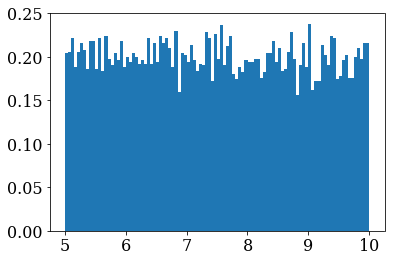

In [2]:
h=plt.hist(np.random.uniform(5,10,10000), bins=100, normed=True)
plt.show()

Avec la méthode ''à la main'' proposées dans le MOOC, qui consiste à générer des nombres aléatoire puis à les rééchelonner, nous obtenons l'histogramme suivant:

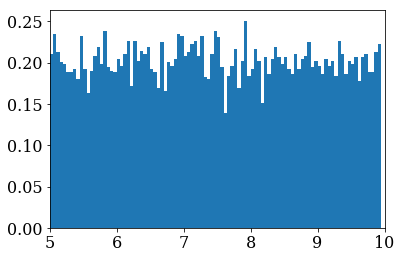

In [3]:
a=5
b=10
x = np.random.random_sample(10000)
y = (b-a)*x+a
binwidth=0.05
plt.xlim(5,10)
plt.hist(y,bins=np.arange(5.,10., binwidth),normed=True);

Nous regardons ensuite la distribution exponentielle

$$
p(x)=
\begin{cases} 
\alpha e^{-\alpha x} &\mbox{pour } x\geq 0 \\
0 &\mbox{si } x<0
\end{cases} 
$$

La fonction fournie par Python est *numpy.random.exponential*. Nous testons avec $$\alpha=\frac{1}{4}$$

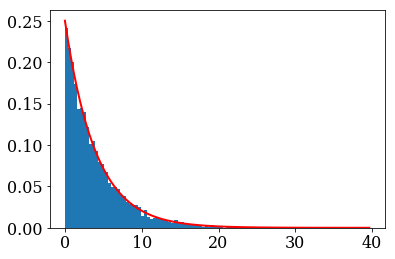

In [4]:
exp=np.random.exponential(4,10000)
count, bins, ignored=plt.hist(exp, bins=100, normed=True)
plt.plot(bins, 1/4*np.exp(-bins / 4), linewidth=2, color='r')
plt.show()

La méthode proposée dans le MOOC impliquait l'utilisation des ''distributions inversibles".

En effet, si on connait la distribution cumulative d'une fonction F, et qu'elle est inversible, on aussi utiliser une générations de nombres aléatoires entre $[0, 1]$ pour reproduire la fonction.

Si un processus aléatoire $X$ est distribué uniformément, on a que $P(X<x)=U(x)$ avec,

$$
U(x)=
\begin{cases} 
0 &\mbox{si } x<0 \\
x &\mbox{si } x\in [0,1] \\ 
1 &\mbox{si } x>1
\end{cases} 
$$

Pour générer un ensemble Y de nombres aléatoires, pour lequel la distribution serait $F$, on va  $F^{-1}$ à X, puisqu'on a que:

\begin{align}
P(Y<y) &= P(F^{-1}(X)<y) \nonumber \\
&= P(X<F(y)) \nonumber \\
&= U(F(y)) \nonumber \\
&= F(y)\nonumber
\end{align}

$Y$ satisfait bien à la fonction de distribution cumulative.

Pour l'exponentielle, cette fonction est:
$$
F(x) =
\begin{cases} 
1 - e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$

dont l'inverse est 
$$
F^{-1}(x) = -\frac{1}{\alpha}\log(1-x).
$$

On applique donc cette méthode comme dans le MOOC:

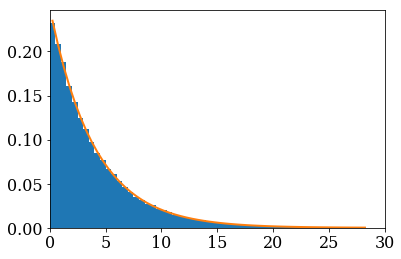

In [5]:
alpha = 0.25 
x = np.random.random_sample(100000)
y = -1/alpha*np.log(1-x)

# Plots
binwidth=0.5
plt.xlim(0,30)
bins=np.arange(0.,29., binwidth)
plt.hist(y,bins,normed=True);

# Centre des bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,alpha*np.exp(-alpha*xc), lw=2)

On compare finalement les distributions gaussiennes, pour les valeurs positives. On commence par celle qui est proposée directement par Python, *numpy.random.normal*.

On essaye de créer une distribution de moyenne $$\mu =0$$
et d'écart-type $$\sigma=1$$
On a superposé l'équation analytique d'une telle gaussienne pour s'assurer que nous avons utilisé la bonne "built-in function". On ne montre que la partie positive de l'histogramme, pour pouvoir comparer à ce qui est proposé dans le MOOC. Ceci est valable puisque notre gaussienne est à priori à peu près symmétrique en 0.

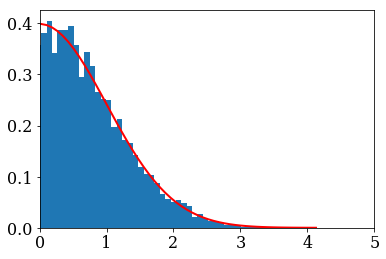

In [6]:
mu, sigma = 0,1
gauss=np.random.normal(mu,sigma,10000)

plt.xlim(0,5)
count, bins, ignored=plt.hist(gauss, bins=100, normed=True)
#courbe d'ajustement
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2 / (2*sigma**2)), linewidth=2, color='r')
plt.show()

Pour obtenir une distribution gaussienne "à la main", on utilise la méthode de rejet de Von Neumann, à partir de la distribution exponentielle comme suggéré dans le MOOC, mais cette fois-ci sur tout l'interval réel. On réalise toutes ces étapes sur deux fois moins de valeurs que dans le cas avec la built-in function, afin que le même nombre de valeurs se retrouvent dans l'intervalle positif.

Brièvement, cette méthode consiste à générer un ensemble de nombres aléatoires obéissant à une distribution $p_1(x)$, et ensuite retirer des valeurs afin que l'ensemble obéisse à distribution $p_2(x)$. Ceci fonctionne s'il existe une constante $K$ telle que:
$$
{p_2(x)}\leq {Kp_1(x)},\quad \forall x.
$$

Ici, on génère un nombre x suivant une distribution exponentielle, et on en génére un autre $U$ entre 0 et 1. On garde $x$ si $U<\frac{p_2(x)}{Kp_1(x)}$.

On a choisi ici $K=1.4$

Size of accepted set h and expected size 1/K: 35596 35714.28571428572


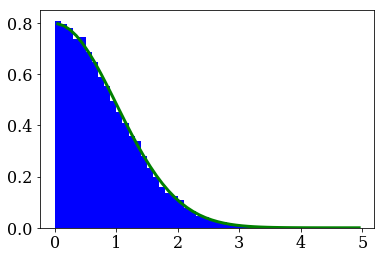

In [7]:
N = 50000
K = 1.4

# Liste vide pour les nombres finaux
h=[]

for i in range(N):
    u1 = np.random.random_sample()
    
    # distribution de g selon une distribution exponentielle
    g = np.log(1/(1-u1))
    
    # génération d'un second nombre pour la condition de rejet/d'admission 
    u2 = np.random.random_sample()
    
    # Admission/reject
    ratio = 2*np.exp(-g**2/2.0)/np.sqrt(2*np.pi) / \
                (K*np.exp(-g))
    if (u2<ratio):
       
        h.append(g)

# Taille du set admis
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

# Plots
binwidth=0.1
bins=np.arange(0.,5.1, binwidth)
plt.hist(h,bins=np.arange(0.,5., binwidth),normed=True,color='blue');


xc = bins[:-1] + binwidth/2
plt.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')

On constate que les deux histogrammes obtenus n'ont pas la même hauteur, donc ne sont pas normalisés de la même manière, ce qui semble logique puisque la méthode dans le MOOC prévoyait bien qu'on n'obtienne uniquement une gaussienne positive, tandis que pour la built-in function, nous avons choisi de ne montrer qu'une partie de l'histogramme. On n'a donc pas normalisé correctement pour ce dernier cas.

Toutefois, on voit que visuellement, les deux histogrammes semblent concordants. On peut en dire autant pour les autres distributions que nous avons testée. Il semble même que les méthodes provenant du MOOC collent mieux aux courbes théoriques que nous avons systématiquement affichées.

2) Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.

On s'aide de l'article Wikipédia portant sur la méthode Box-Muller:  https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller . 

On constate qu'il existe deux écritures: la transformation de Box-Muller à proprement parler, et la méthode polaire. Nous allons implémenter la première, plus simple, car la seconde requiert que l'on rejette certaines combinaisons de nombres aléatoires s'ils ne satisfont pas à certaines conditions.

On va donc générer N paires de nombres aléatoires (x,y) uniformément distribués entre ]0,1].

In [8]:
N=1000
x = np.random.random_sample(N)
y = np.random.random_sample(N)

On définit ensuite la transformation pour obtenir deux variables $z_0$ et $z_1$ qui vont suivre une loi normale centrée réduite.
$$z_0=\sqrt{-2log(x)}cos(2\pi y)$$
$$z_1=\sqrt{-2log(x)}sin(2\pi y)$$

In [9]:
def boxmuller(x,y):
    z0 = np.sqrt(-2*np.log(x))*np.cos(2*np.pi*y)
    z1 = np.sqrt(-2*np.log(x))*np.sin(2*np.pi*y)
    return z0,z1

On applique ensuite la transformation aux N paires (x,y) que nous avons générées, et on réalise un histogramme pour $z_0$ et $z_1$pour vérifier qu'on a bien une loi normale centrée réduite, en superposant la courbe d'une telle loi.

In [10]:
z0,z1=boxmuller(x,y)

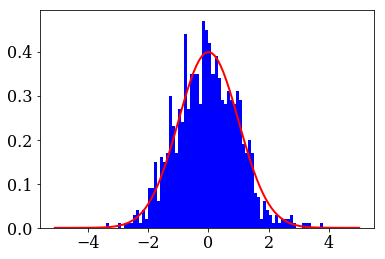

In [11]:
binwidth=0.1
sigma=1
mu=0
bins=np.arange(-5.1,5.1, binwidth)
plt.hist(z0,bins=np.arange(-5.,5., binwidth),normed=True,color='blue')
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2 / (2*sigma**2)), linewidth=2, color='r')

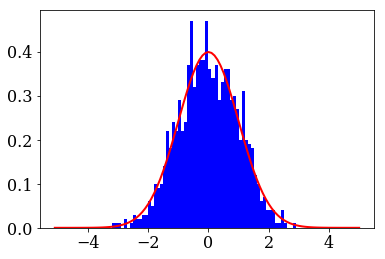

In [12]:
binwidth=0.1
bins=np.arange(-5.1,5.1, binwidth)
plt.hist(z1,bins=np.arange(-5.,5., binwidth),normed=True,color='blue')
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2 / (2*sigma**2)), linewidth=2, color='r')

On constate que pour N=1000, pour les valeurs autours de la moyenne, la méthode de Box-Muller ne rend pas tout à fait des fréquences collant à la gaussienne attendue. Elles sont systématiquement un peu trop hautes. Par contre, si l'on teste pour un plus grand nombre N, par exemple N=10000:

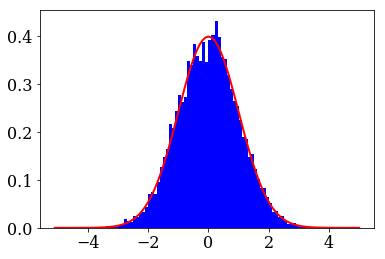

In [13]:
N2=10000
x2 = np.random.random_sample(N2)
y2 = np.random.random_sample(N2)
z02,z12=boxmuller(x2,y2)

binwidth=0.1
sigma=1
mu=0
bins=np.arange(-5.1,5.1, binwidth)
plt.hist(z02,bins=np.arange(-5.,5., binwidth),normed=True,color='blue')
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2 / (2*sigma**2)), linewidth=2, color='r')

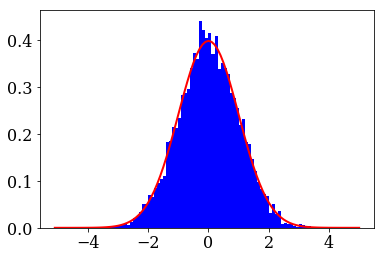

In [14]:
binwidth=0.1
bins=np.arange(-5.1,5.1, binwidth)
plt.hist(z12,bins=np.arange(-5.,5., binwidth),normed=True,color='blue')
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2 / (2*sigma**2)), linewidth=2, color='r')

On voit que la méthode de Box-Muller est alors beaucoup plus fidèle à ce à quoi on s'attend.

On voit aussi que les deux soluions données par la méthode de Box-Muller donne la même distribution.

Pour conclure on peut dire que cette méthode est efficace pour un grand nombre de données.